In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv(r"C:\Users\Pranjal\Desktop\data\travel insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [11]:
print(df['Gender'].value_counts())
print(df.isnull().any())
print(df['Gender'].isnull().sum())

M    9347
F    8872
Name: Gender, dtype: int64
Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool
45107


In [13]:
df=df.dropna()
print(df['Gender'].any()==np.nan)

False


In [14]:
df['Age'].describe()

count    18219.000000
mean        44.785444
std         20.894323
min          0.000000
25%         31.000000
50%         40.000000
75%         52.000000
max        118.000000
Name: Age, dtype: float64

Checking the data in the duration column

In [15]:
df['Duration'].describe()

count    18219.000000
mean        68.708491
std        112.977561
min         -2.000000
25%          9.000000
50%         21.000000
75%         57.000000
max        740.000000
Name: Duration, dtype: float64

In [16]:
df=df[df.Duration!=0]

Some visulalisation

In [17]:
print(df['Duration'].any()==0)
df['Claim'].value_counts()

False


No     17542
Yes      639
Name: Claim, dtype: int64

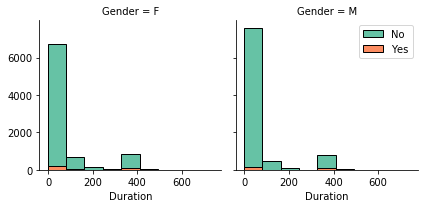

In [18]:
import seaborn as sns
bins = np.linspace(df.Duration.min(), df.Duration.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Claim", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Duration', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

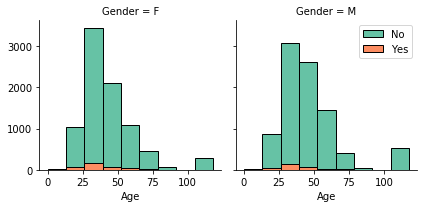

In [20]:
bins = np.linspace(df.Age.min(), df.Age.max(),10)
g = sns.FacetGrid(df, col='Gender',hue='Claim', palette='Set2', col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

Pre Processing

In [21]:
df.groupby(['Gender'])['Claim'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['F','M'],value=[0,1],inplace=True)

In [22]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,71
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,0,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,1,47
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.0,49.40,0,48
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,1,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,0,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,1,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,1,63


In [25]:
Feature = df[['Duration', 'Distribution Channel', 'Net Sales',  'Age', 'Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['Distribution Channel'])], axis=1)

In [26]:
Feature.head()

,Duration,Distribution Channel,Net Sales,Age,Gender,Offline,Online
0,186,Offline,-29.0,81,0,1,0
1,186,Offline,-29.0,71,0,1,0
5,66,Online,-121.0,44,0,0,1
11,1,Online,-18.0,47,1,0,1
12,53,Online,-130.0,48,0,0,1


In [27]:
X = Feature[['Duration', 'Net Sales', 'Age', 'Gender', 'Offline','Online']]
X.head()

,Duration,Net Sales,Age,Gender,Offline,Online
0,186,-29.0,81,0,1,0
1,186,-29.0,71,0,1,0
5,66,-121.0,44,0,0,1
11,1,-18.0,47,1,0,1
12,53,-130.0,48,0,0,1


In [29]:
y = df['Claim']
y = df['Claim'].replace(to_replace=['Yes','No'], value=[0,1]).values

Now use train test split

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [31]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat=LR.predict(x_train)
y_proba=LR.predict_proba(x_train)

In [35]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_train, yhat))

0.9647964796479648


C:\Users\Pranjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Conclusion

Here,I predict the status of insurance i use the model logistic regression and accuracy of my model is 96%